# Investigating Dashboard Pace by Counsellor by Week

In [2]:
# Render plots inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

pd.set_option('display.mpl_style', 'default')
df = pd.read_csv('pace_counsellor_week.csv', encoding="utf-8-sig")
df.columns

Index(['pcw_id', 'week_number', 'dashboard_date', 'counsellor', 'region',
       'inq', 'sub', 'com', 'adm', 'dep', 'pre', 'pay', 'act'],
      dtype='object')

## What does it look like?

In [5]:
df.sample(5)

,pcw_id,week_number,dashboard_date,counsellor,region,inq,sub,com,adm,dep,pre,pay,act
657,658,34,Aug 4,Chris Wong,Vancouver,170,-47,-16,-5,1,4,0,0
529,530,28,Jun 23,Chett Fitchett,GBC,52,-27,-14,-12,-10,0,0,0
374,375,20,Apr 28,Susie Strait,USA,1379,42,27,32,4,0,0,0
193,194,11,Mar 3,Palmer Muntz,Washington,4,25,24,24,-6,0,0,0
209,210,12,Mar 10,Chett Fitchett,GBC,102,-9,-1,1,-2,0,0,0


In [7]:
df.describe()

,pcw_id,week_number,inq,sub,com,adm,dep,pre,pay,act
count,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000
mean,379.000000,20.343461,285.684280,-7.352708,3.768824,6.793923,-2.731836,-0.800528,-0.297226,-0.248349
std,218.671367,11.127847,634.986195,44.808364,24.521844,25.503757,14.720525,8.360660,5.088908,4.813082
min,1.000000,1.000000,-341.000000,-237.000000,-161.000000,-147.000000,-103.000000,-70.000000,-65.000000,-56.000000
25%,190.000000,11.000000,29.000000,-19.000000,-10.000000,-7.000000,-6.000000,0.000000,0.000000,0.000000
50%,379.000000,20.000000,111.000000,-6.000000,1.000000,1.000000,-2.000000,0.000000,0.000000,0.000000
75%,568.000000,30.000000,194.000000,9.000000,14.000000,15.000000,3.000000,0.000000,0.000000,0.000000
max,757.000000,39.000000,3484.000000,232.000000,173.000000,161.000000,70.000000,61.000000,52.000000,54.000000


## Let's look at Totals

In [10]:
totals = df.loc[df['counsellor'] == 'Total']
totals[:5]

,pcw_id,week_number,dashboard_date,counsellor,region,inq,sub,com,adm,dep,pre,pay,act
17,18,1,Nov 25,Total,NaN,3113,68,52,32,-22,0,0,0
35,36,2,Dec 2,Total,NaN,3213,67,44,13,-26,0,0,0
53,54,3,Dec 8,Total,NaN,3410,37,29,0,-27,0,0,0
71,72,4,Dec 15,Total,NaN,3439,40,53,-13,-32,0,0,0
89,90,5,Jan 3,Total,NaN,3234,33,79,-16,-34,0,0,0


## Totals by Stage

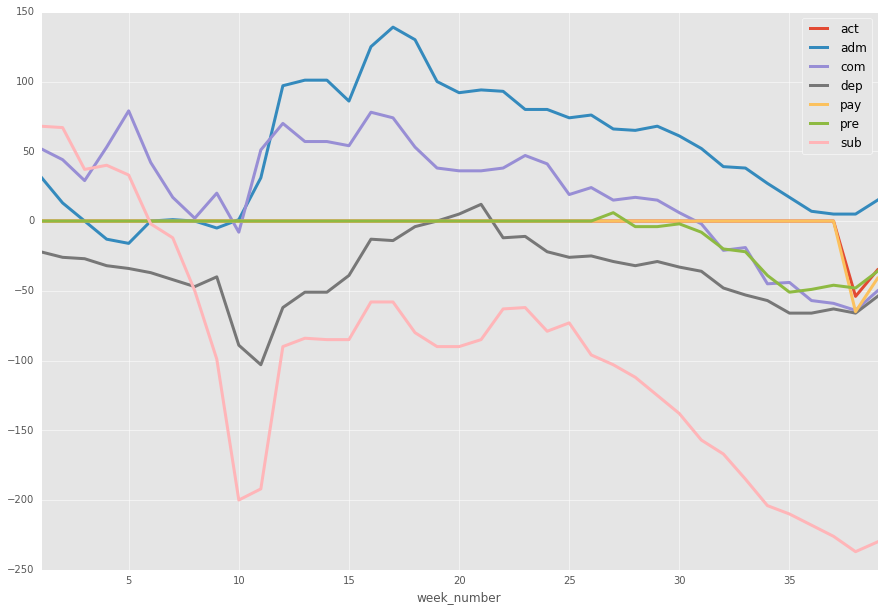

In [39]:
matplotlib.style.use('ggplot')
plt.figure()
plt.rcParams['figure.figsize'] = (15, 10)

stage = totals[['week_number', 'sub', 'com', 'adm', 'dep', 'pre', 'pay', 'act']]
stage = stage.pivot_table(index='week_number')
stage.plot(linewidth=3)

## Let's look at Inq

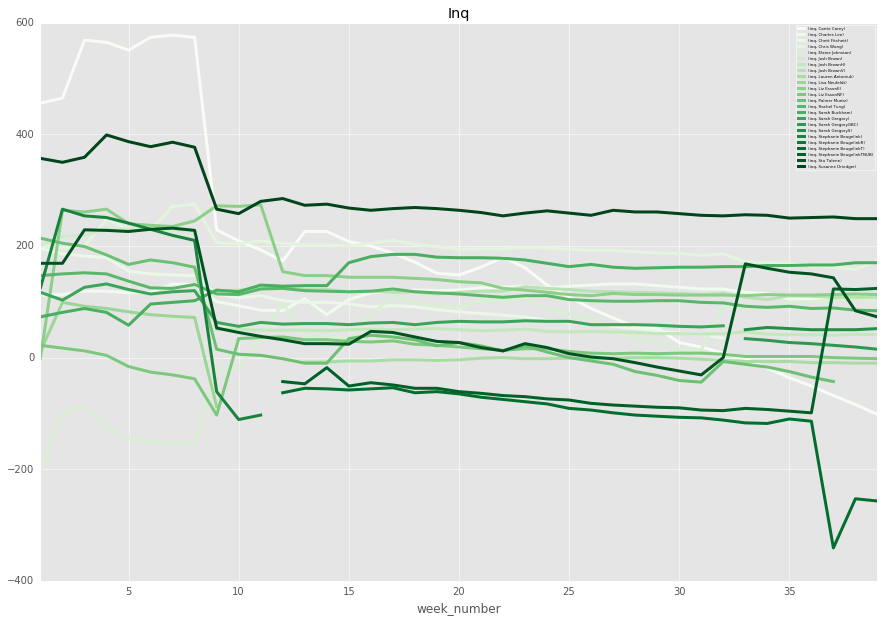

In [117]:
# Remove Totals.
inq = df.loc[df['counsellor'] != 'Total']
# Remove USA.
inq = inq.loc[inq['region'] != 'USA']

# Get only inq.
inq = inq[['week_number', 'counsellor', 'inq']]
inq = inq.pivot_table(index='week_number', columns='counsellor')
inq.plot(title='Inq', linewidth=3, colormap='Greens').legend(loc=1, prop={'size': 4})

## Go through each stage

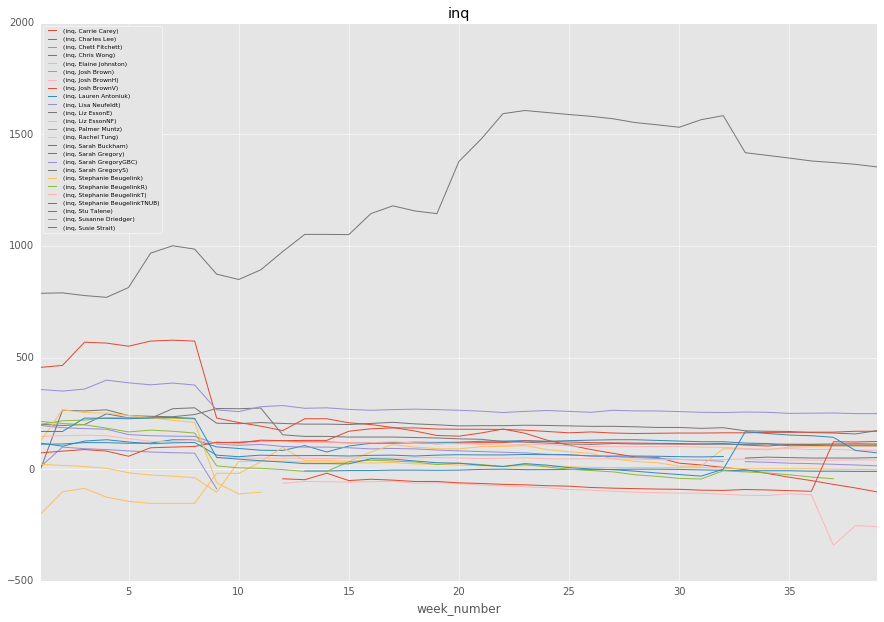

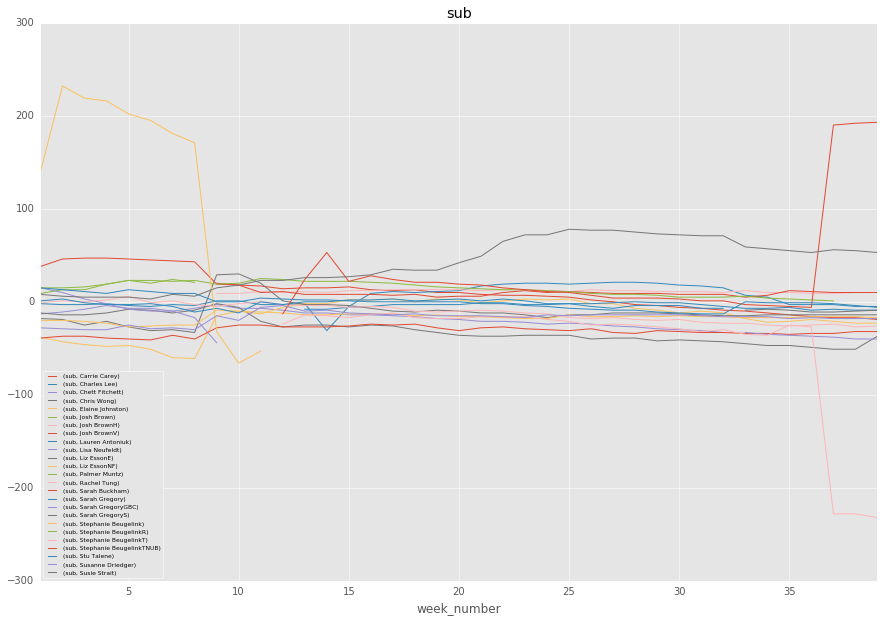

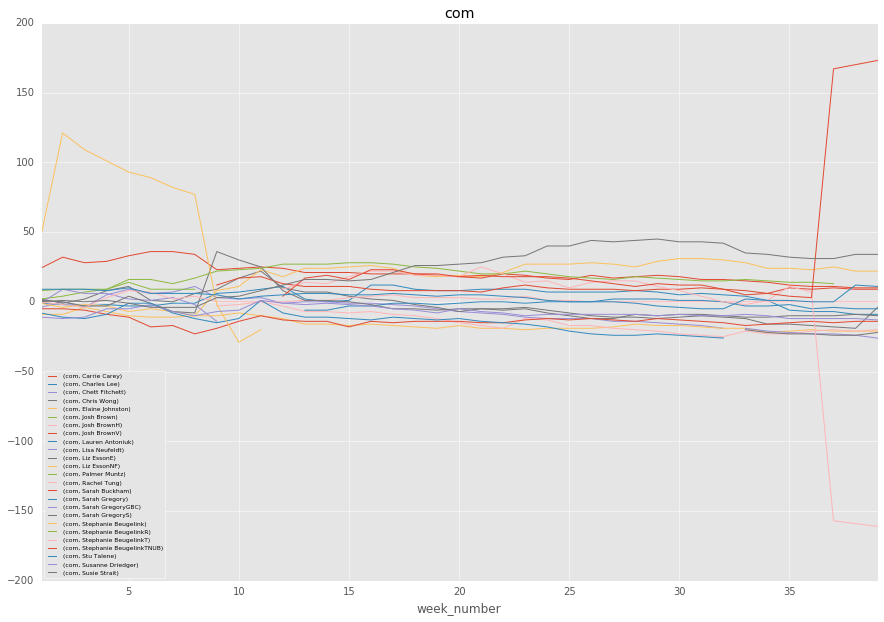

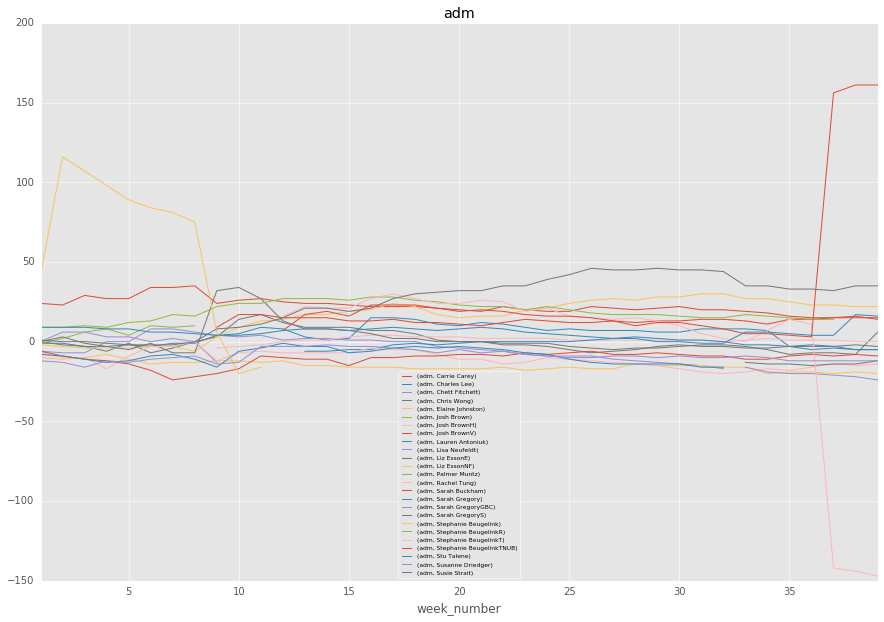

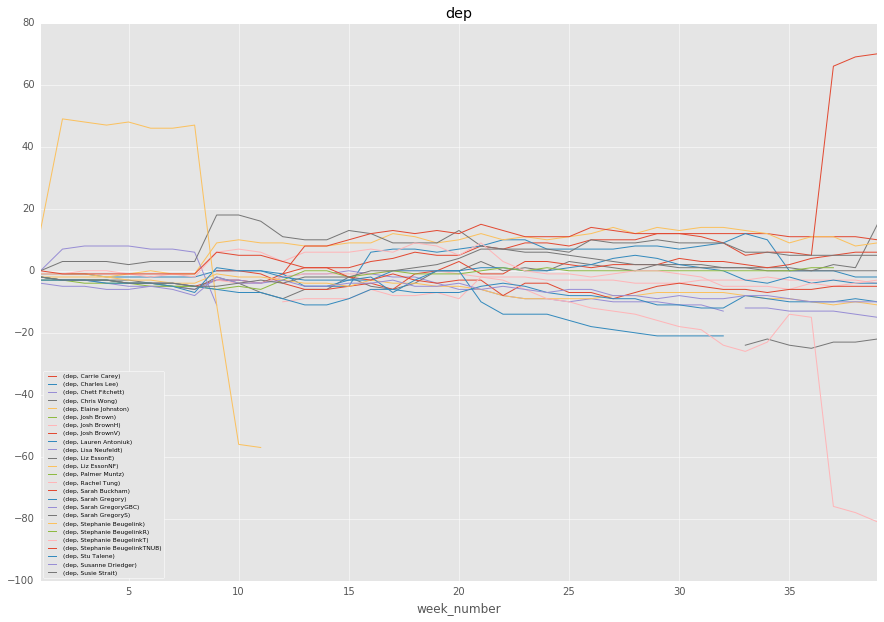

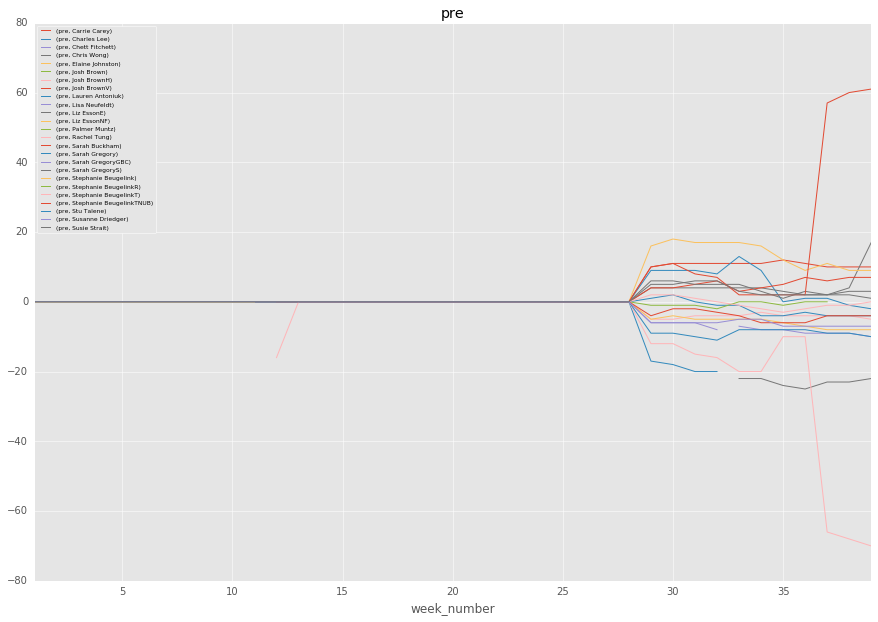

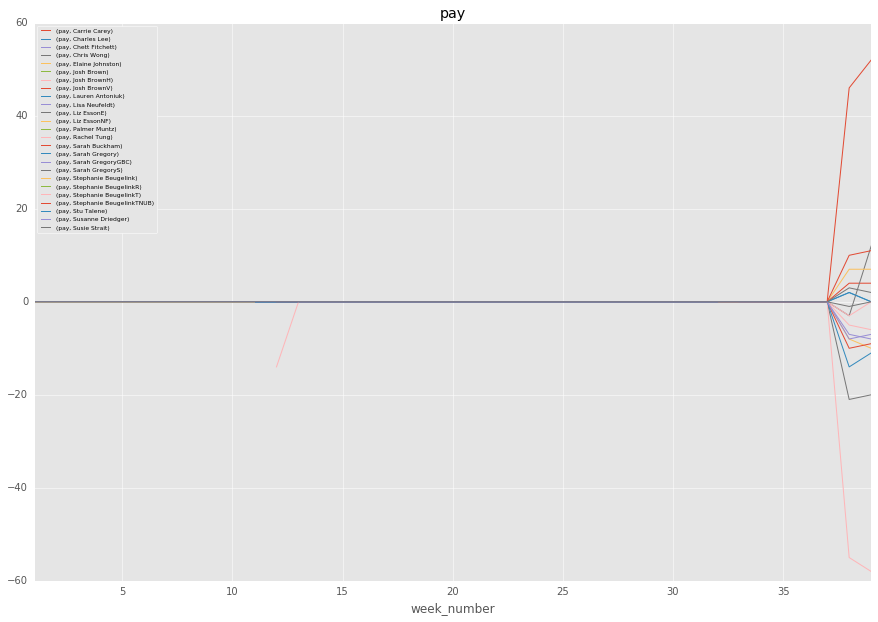

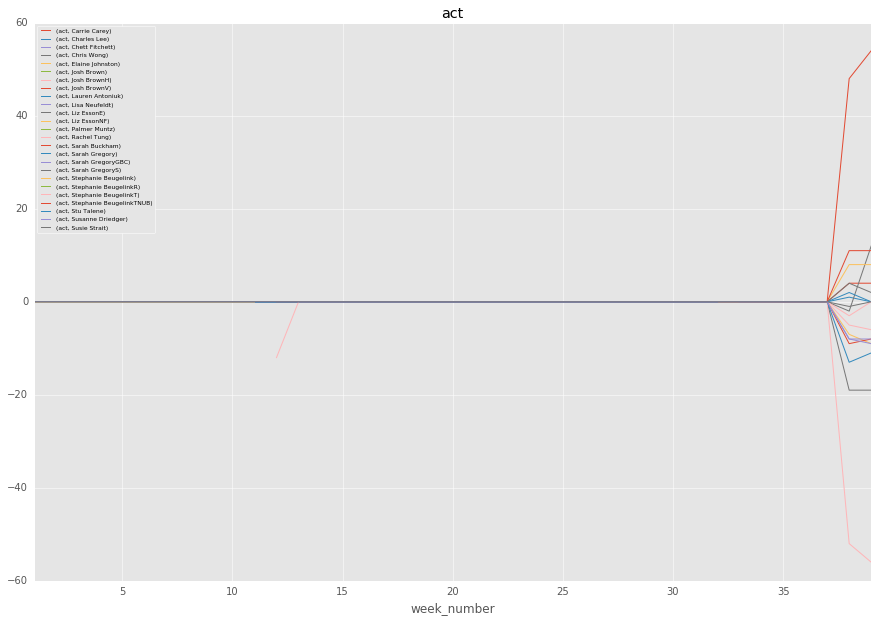

In [118]:
# Remove Totals.
cleanedup = df.loc[df['counsellor'] != 'Total']

for stage in ['inq', 'sub', 'com', 'adm', 'dep', 'pre', 'pay', 'act']:
    stagedf = cleanedup[['week_number', 'counsellor', stage]]
    stagedf = stagedf.pivot_table(index='week_number', columns='counsellor')
    fig = plt.figure()
    fig.suptitle(stage)
    stagedf.plot(title=stage).legend(loc='best', prop={'size': 6})